                Assignment No 16 - Neural Network (Gas Turbines Data)

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df.shape

(15039, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [7]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [8]:
df = df.drop_duplicates()
df.shape

(15039, 11)

In [9]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [10]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


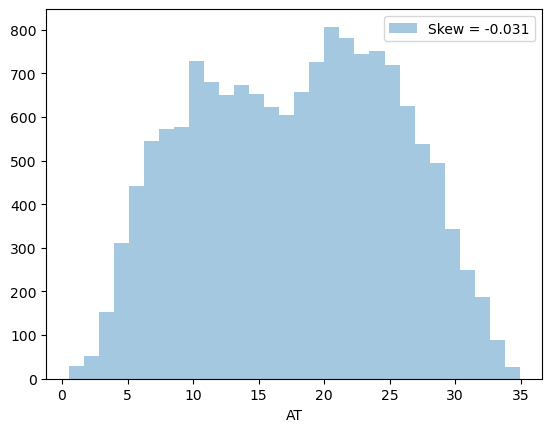

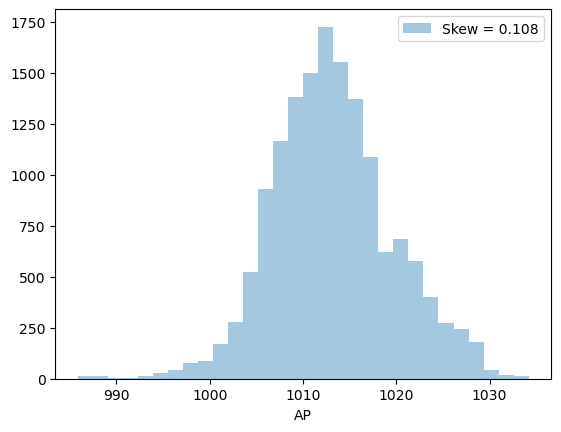

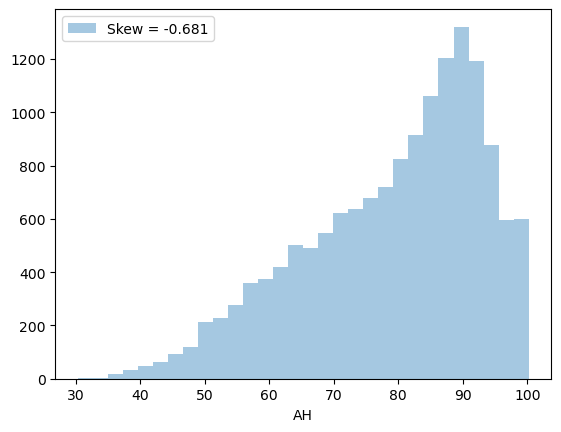

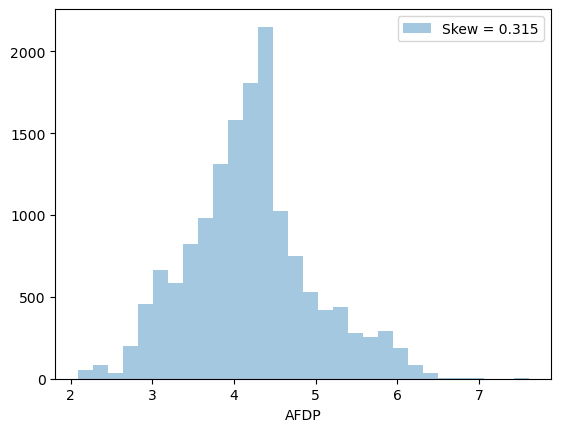

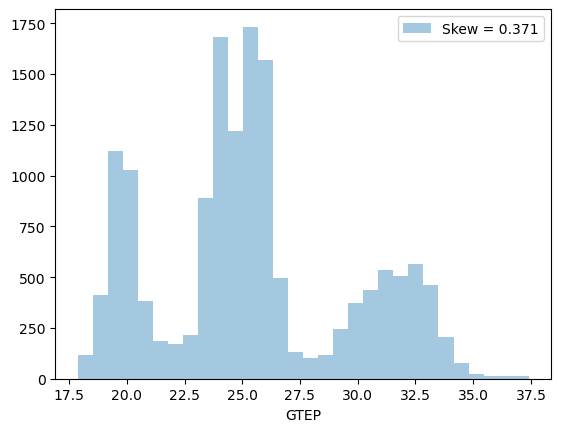

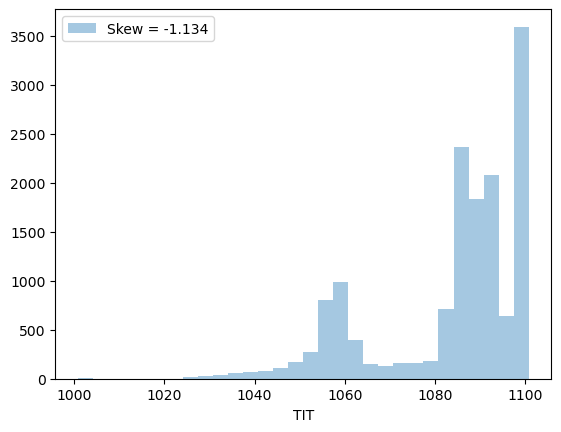

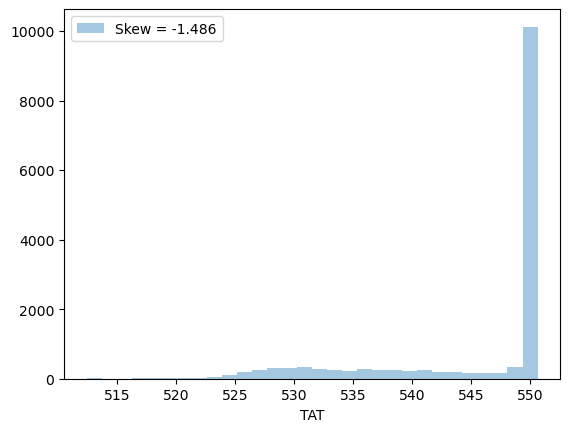

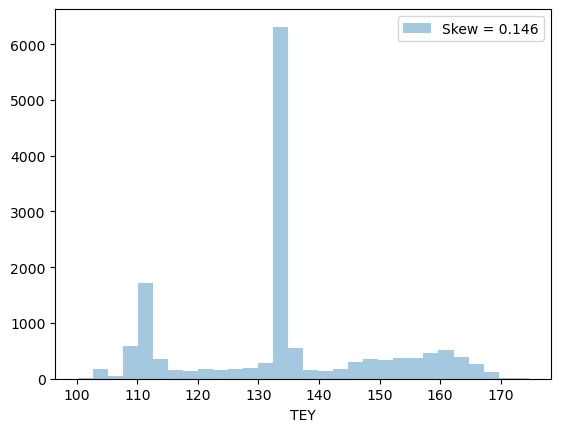

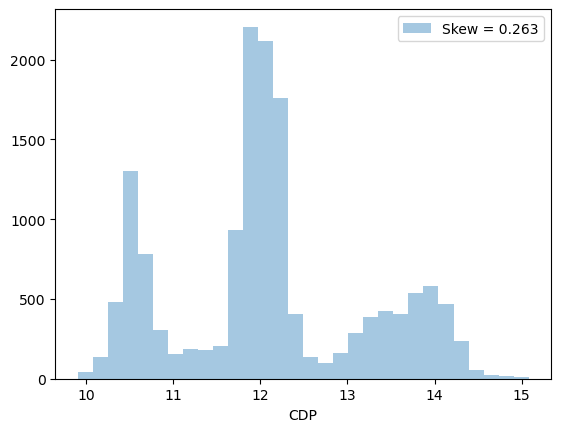

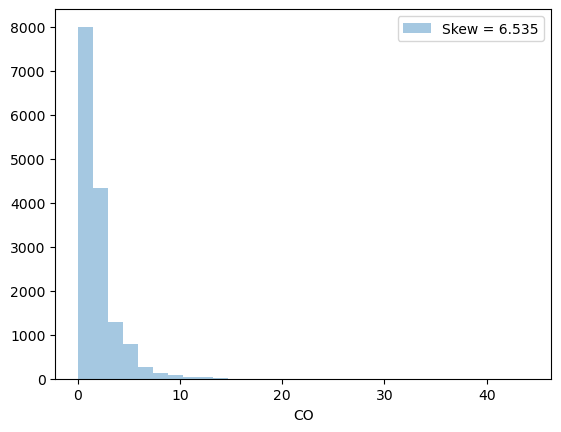

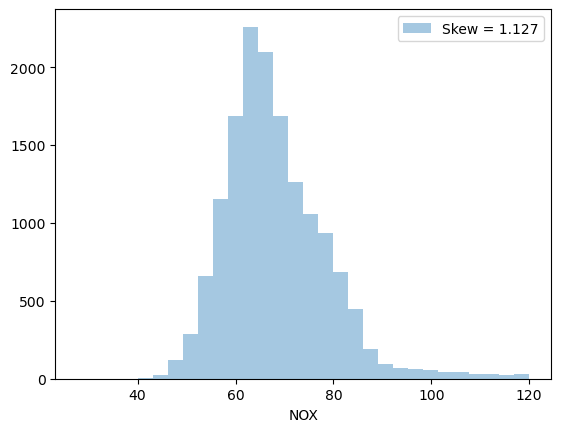

In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [13]:
# Detect observations with more than one outlier
from collections import Counter

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 1543 observations with more than 2 outliers


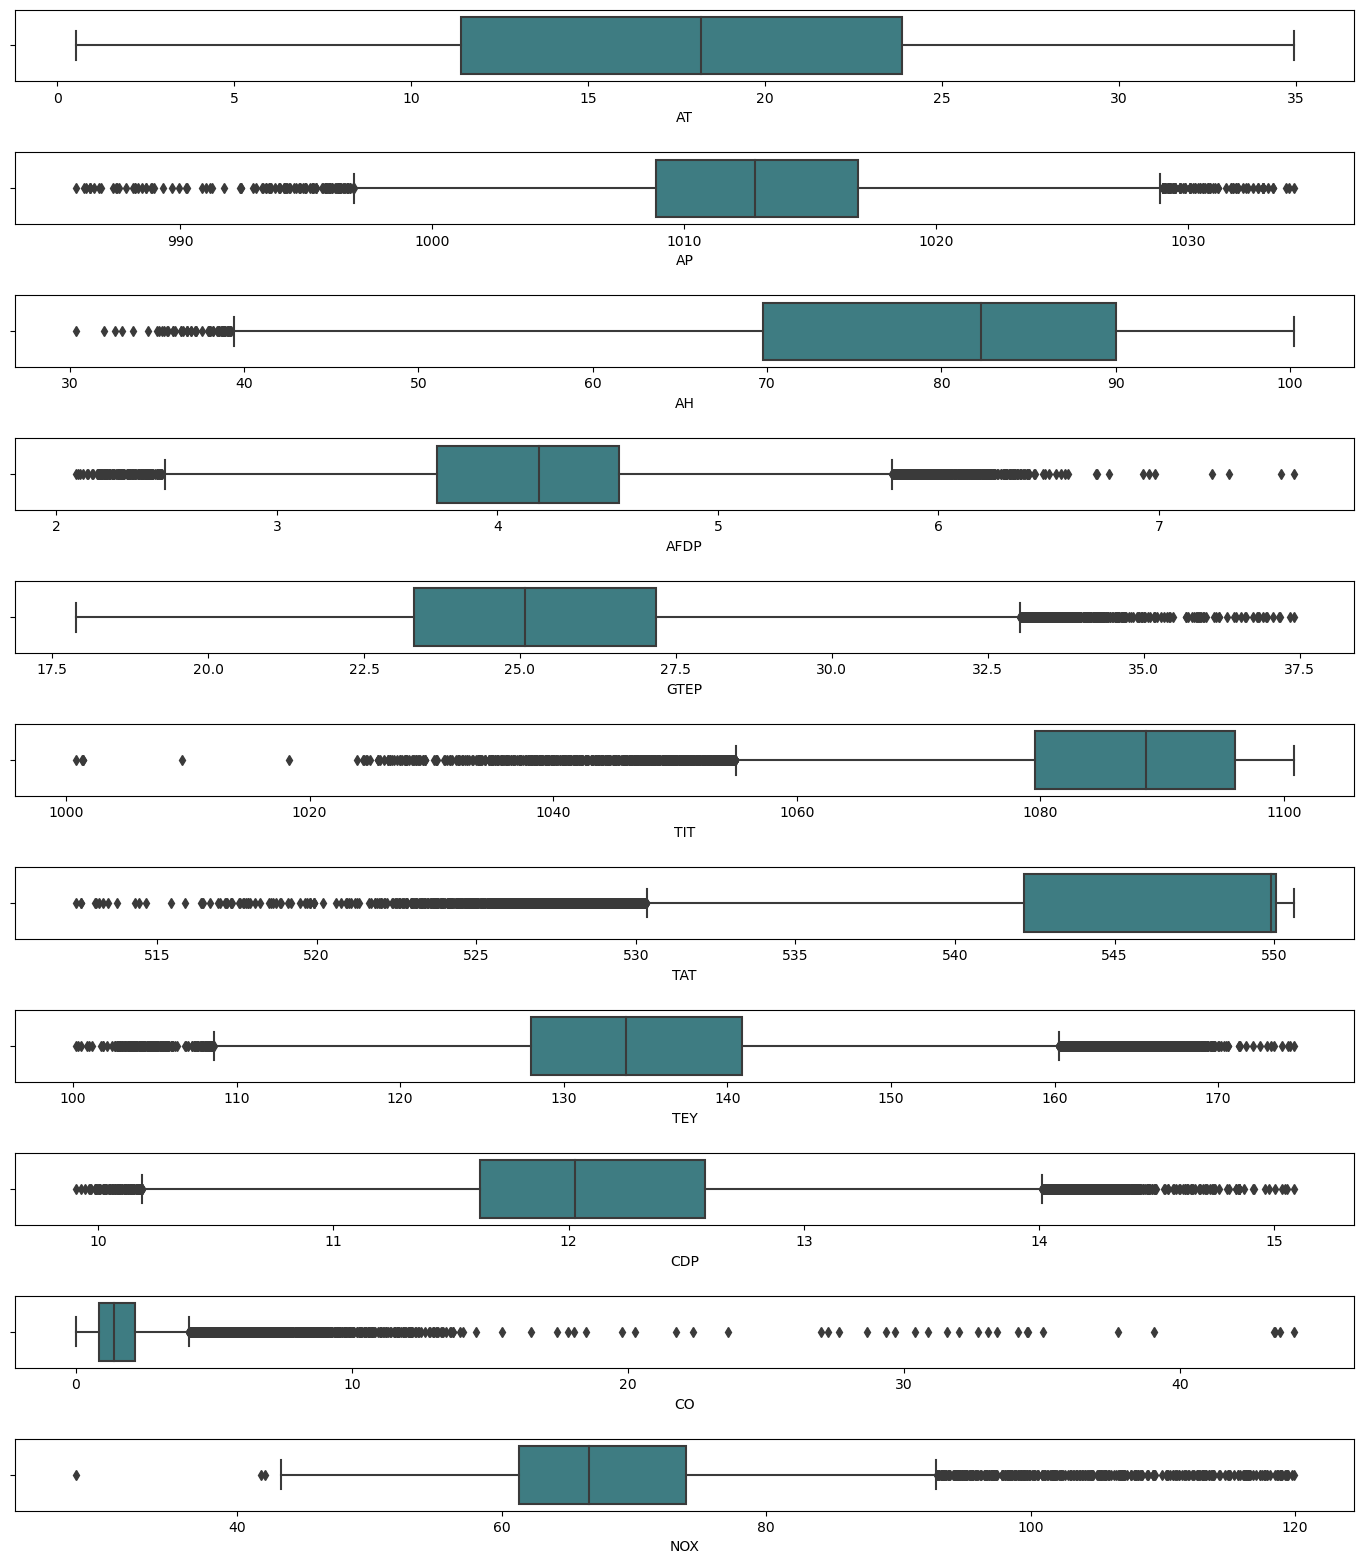

In [17]:
ot=df.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

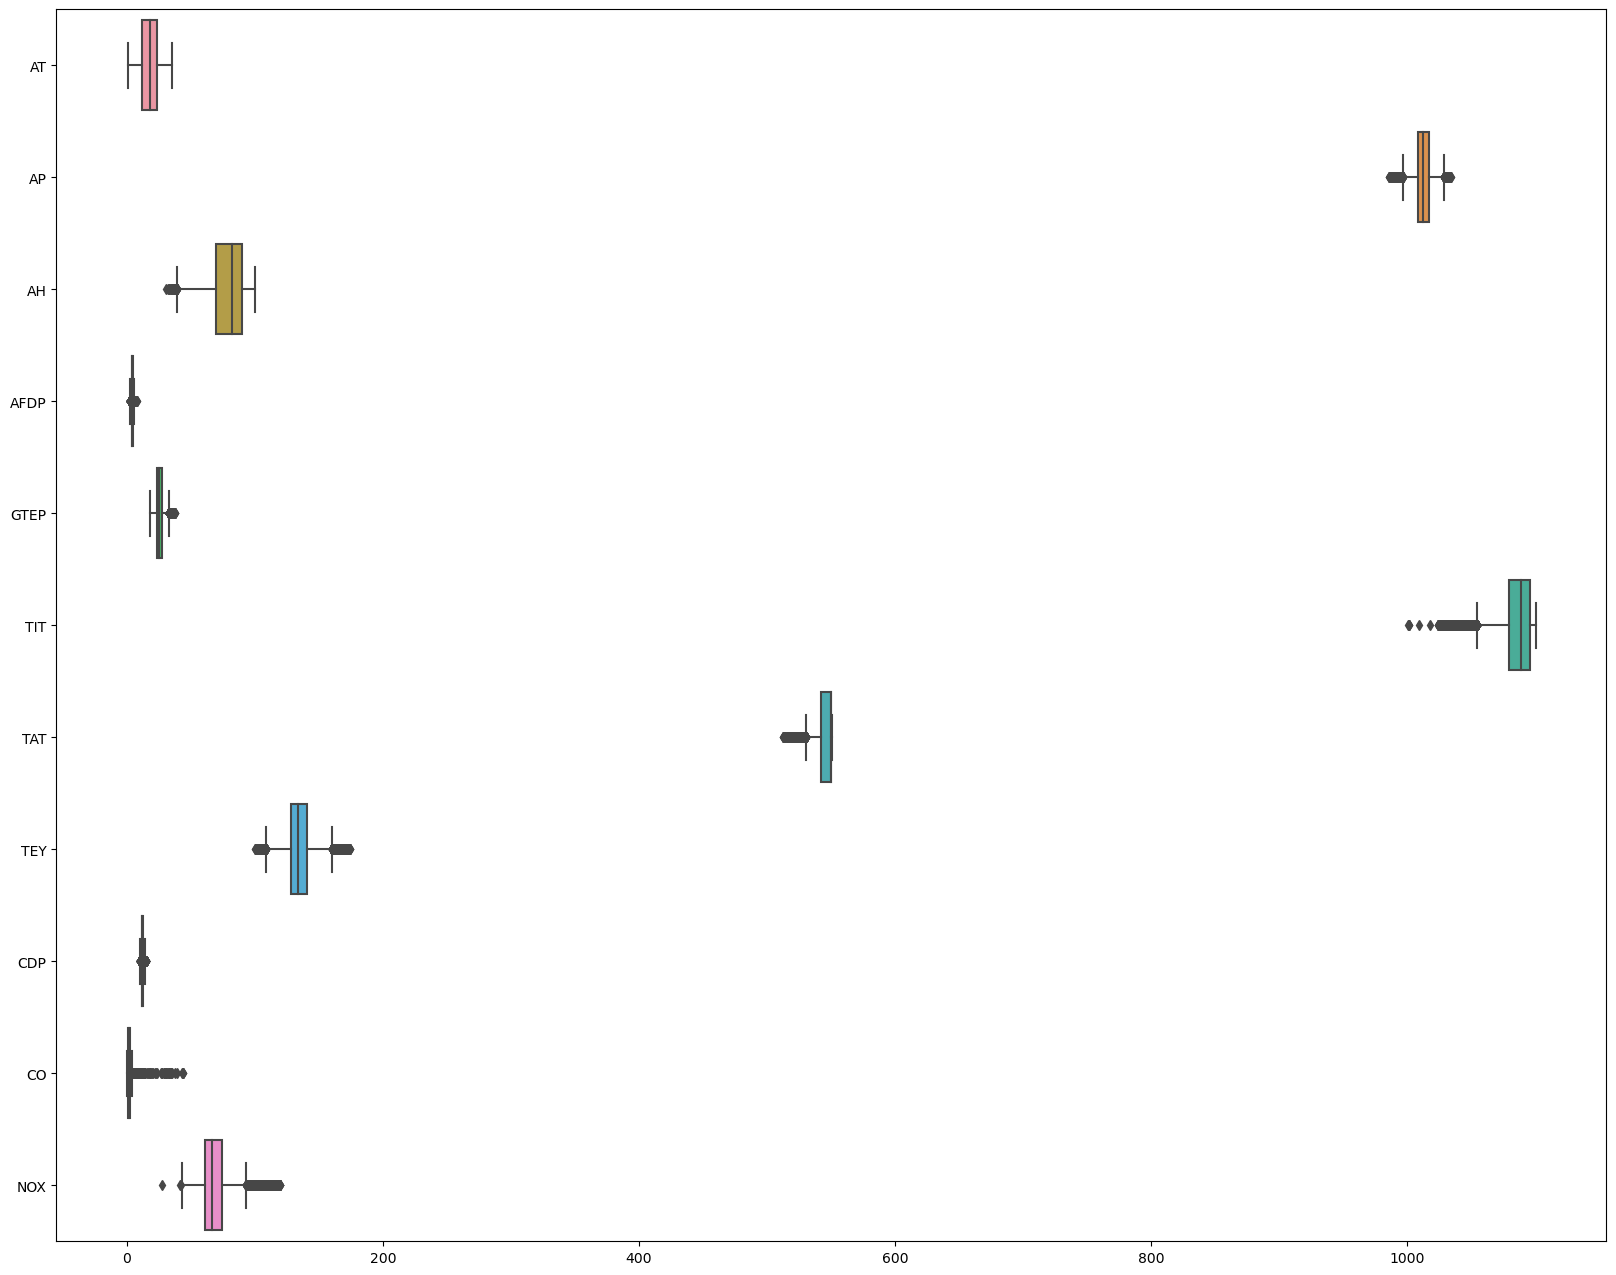

In [18]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

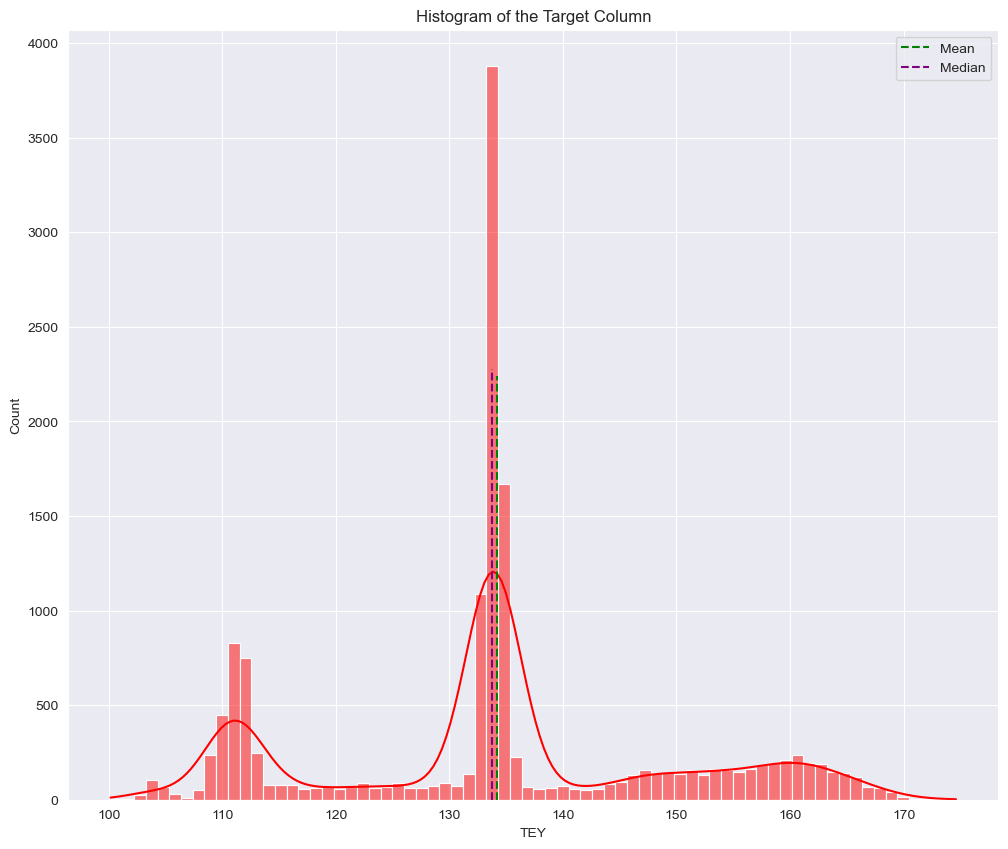

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

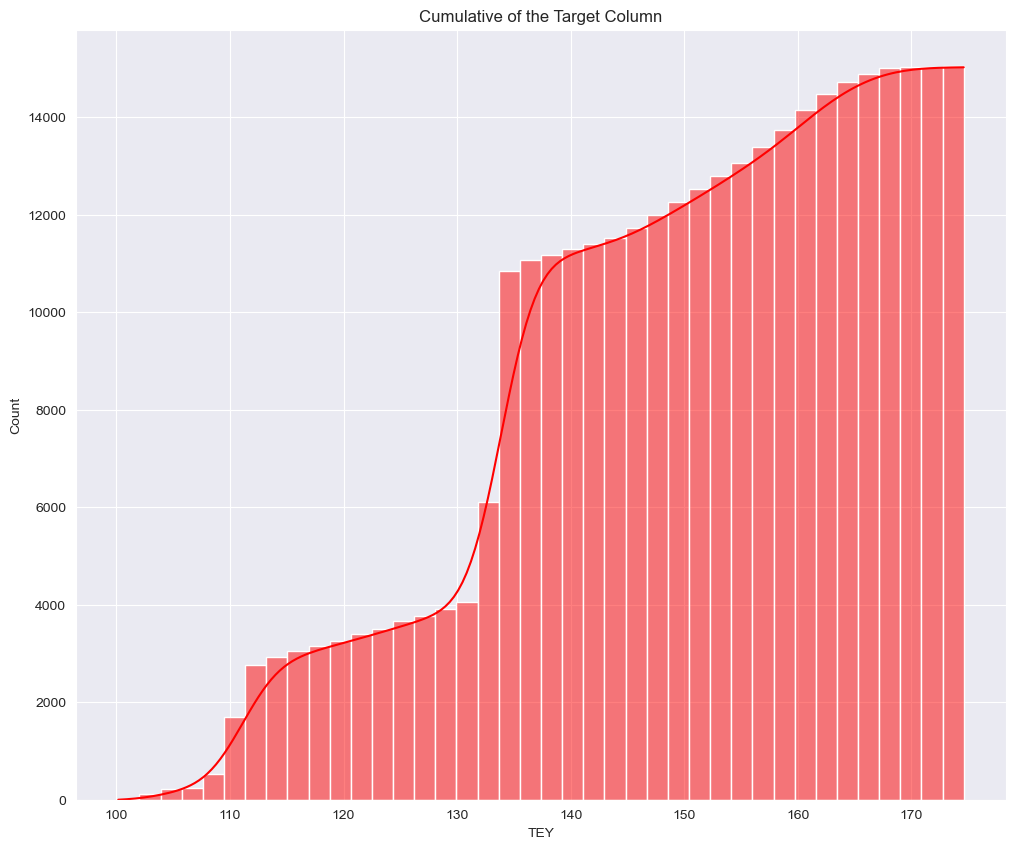

In [20]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

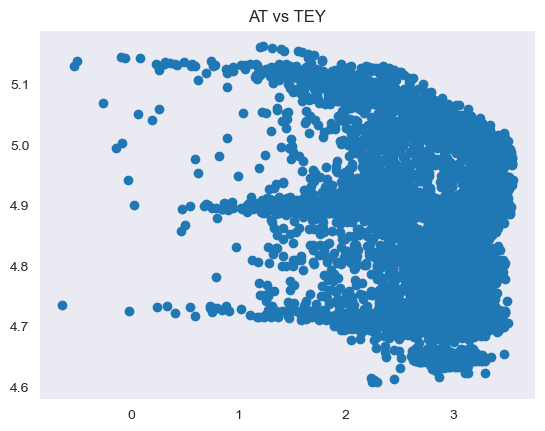

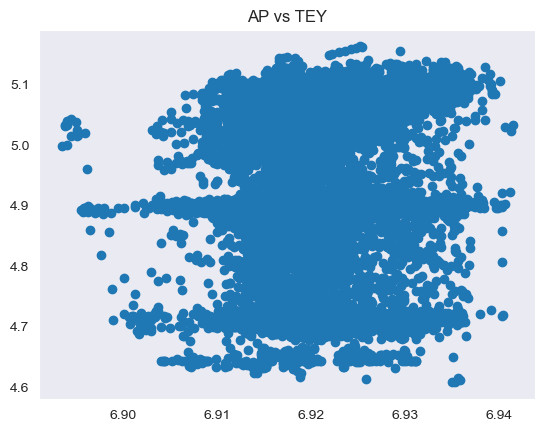

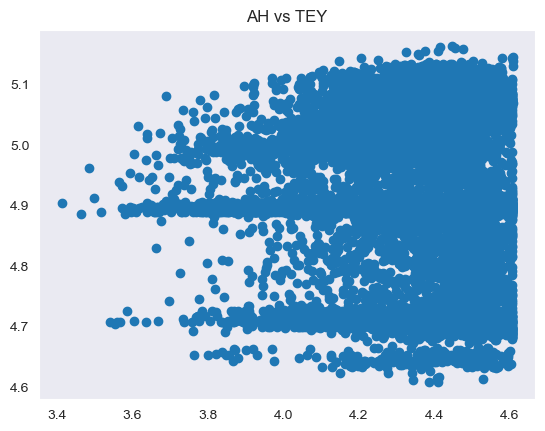

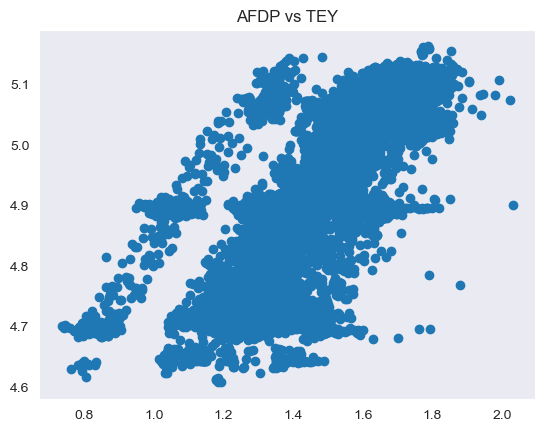

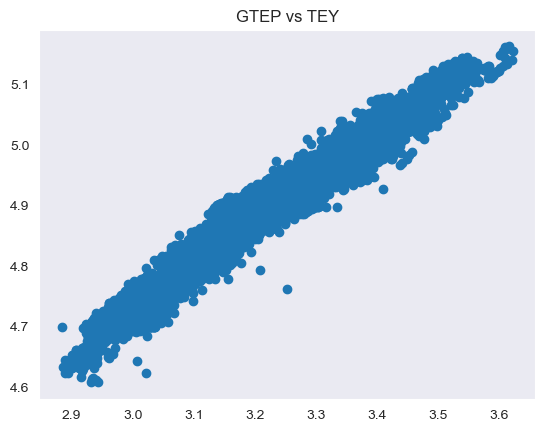

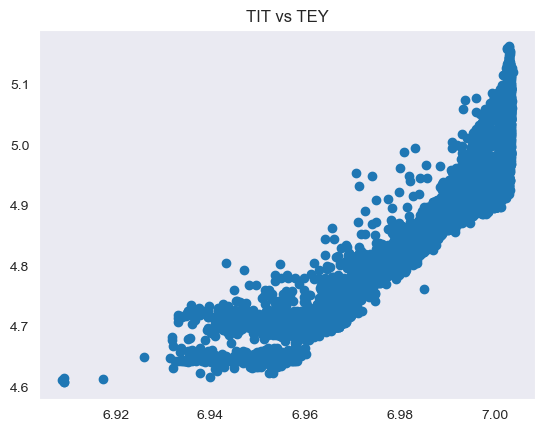

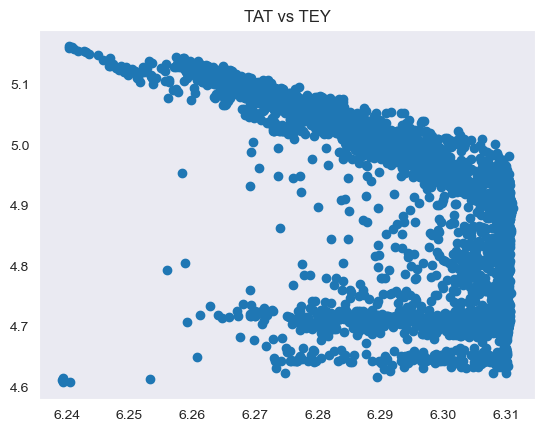

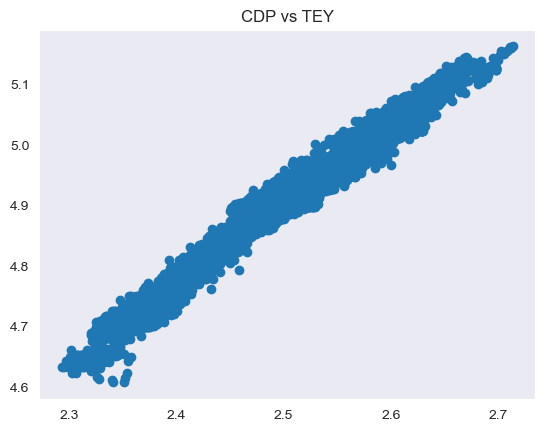

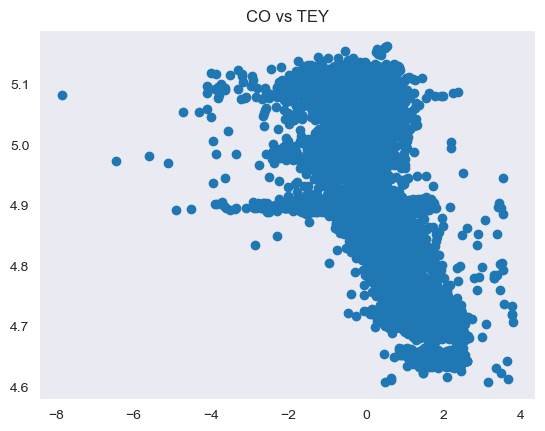

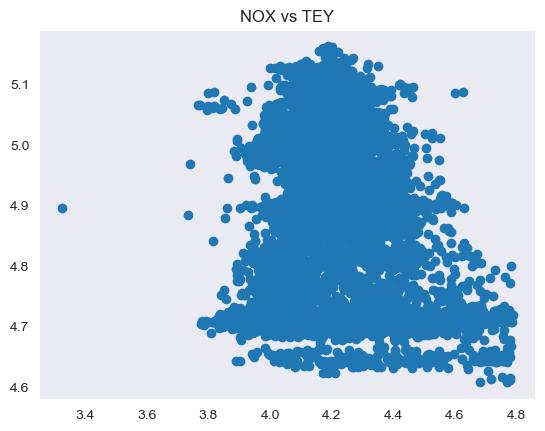

In [21]:
for i in df.columns:
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

<Figure size 2000x2000 with 0 Axes>

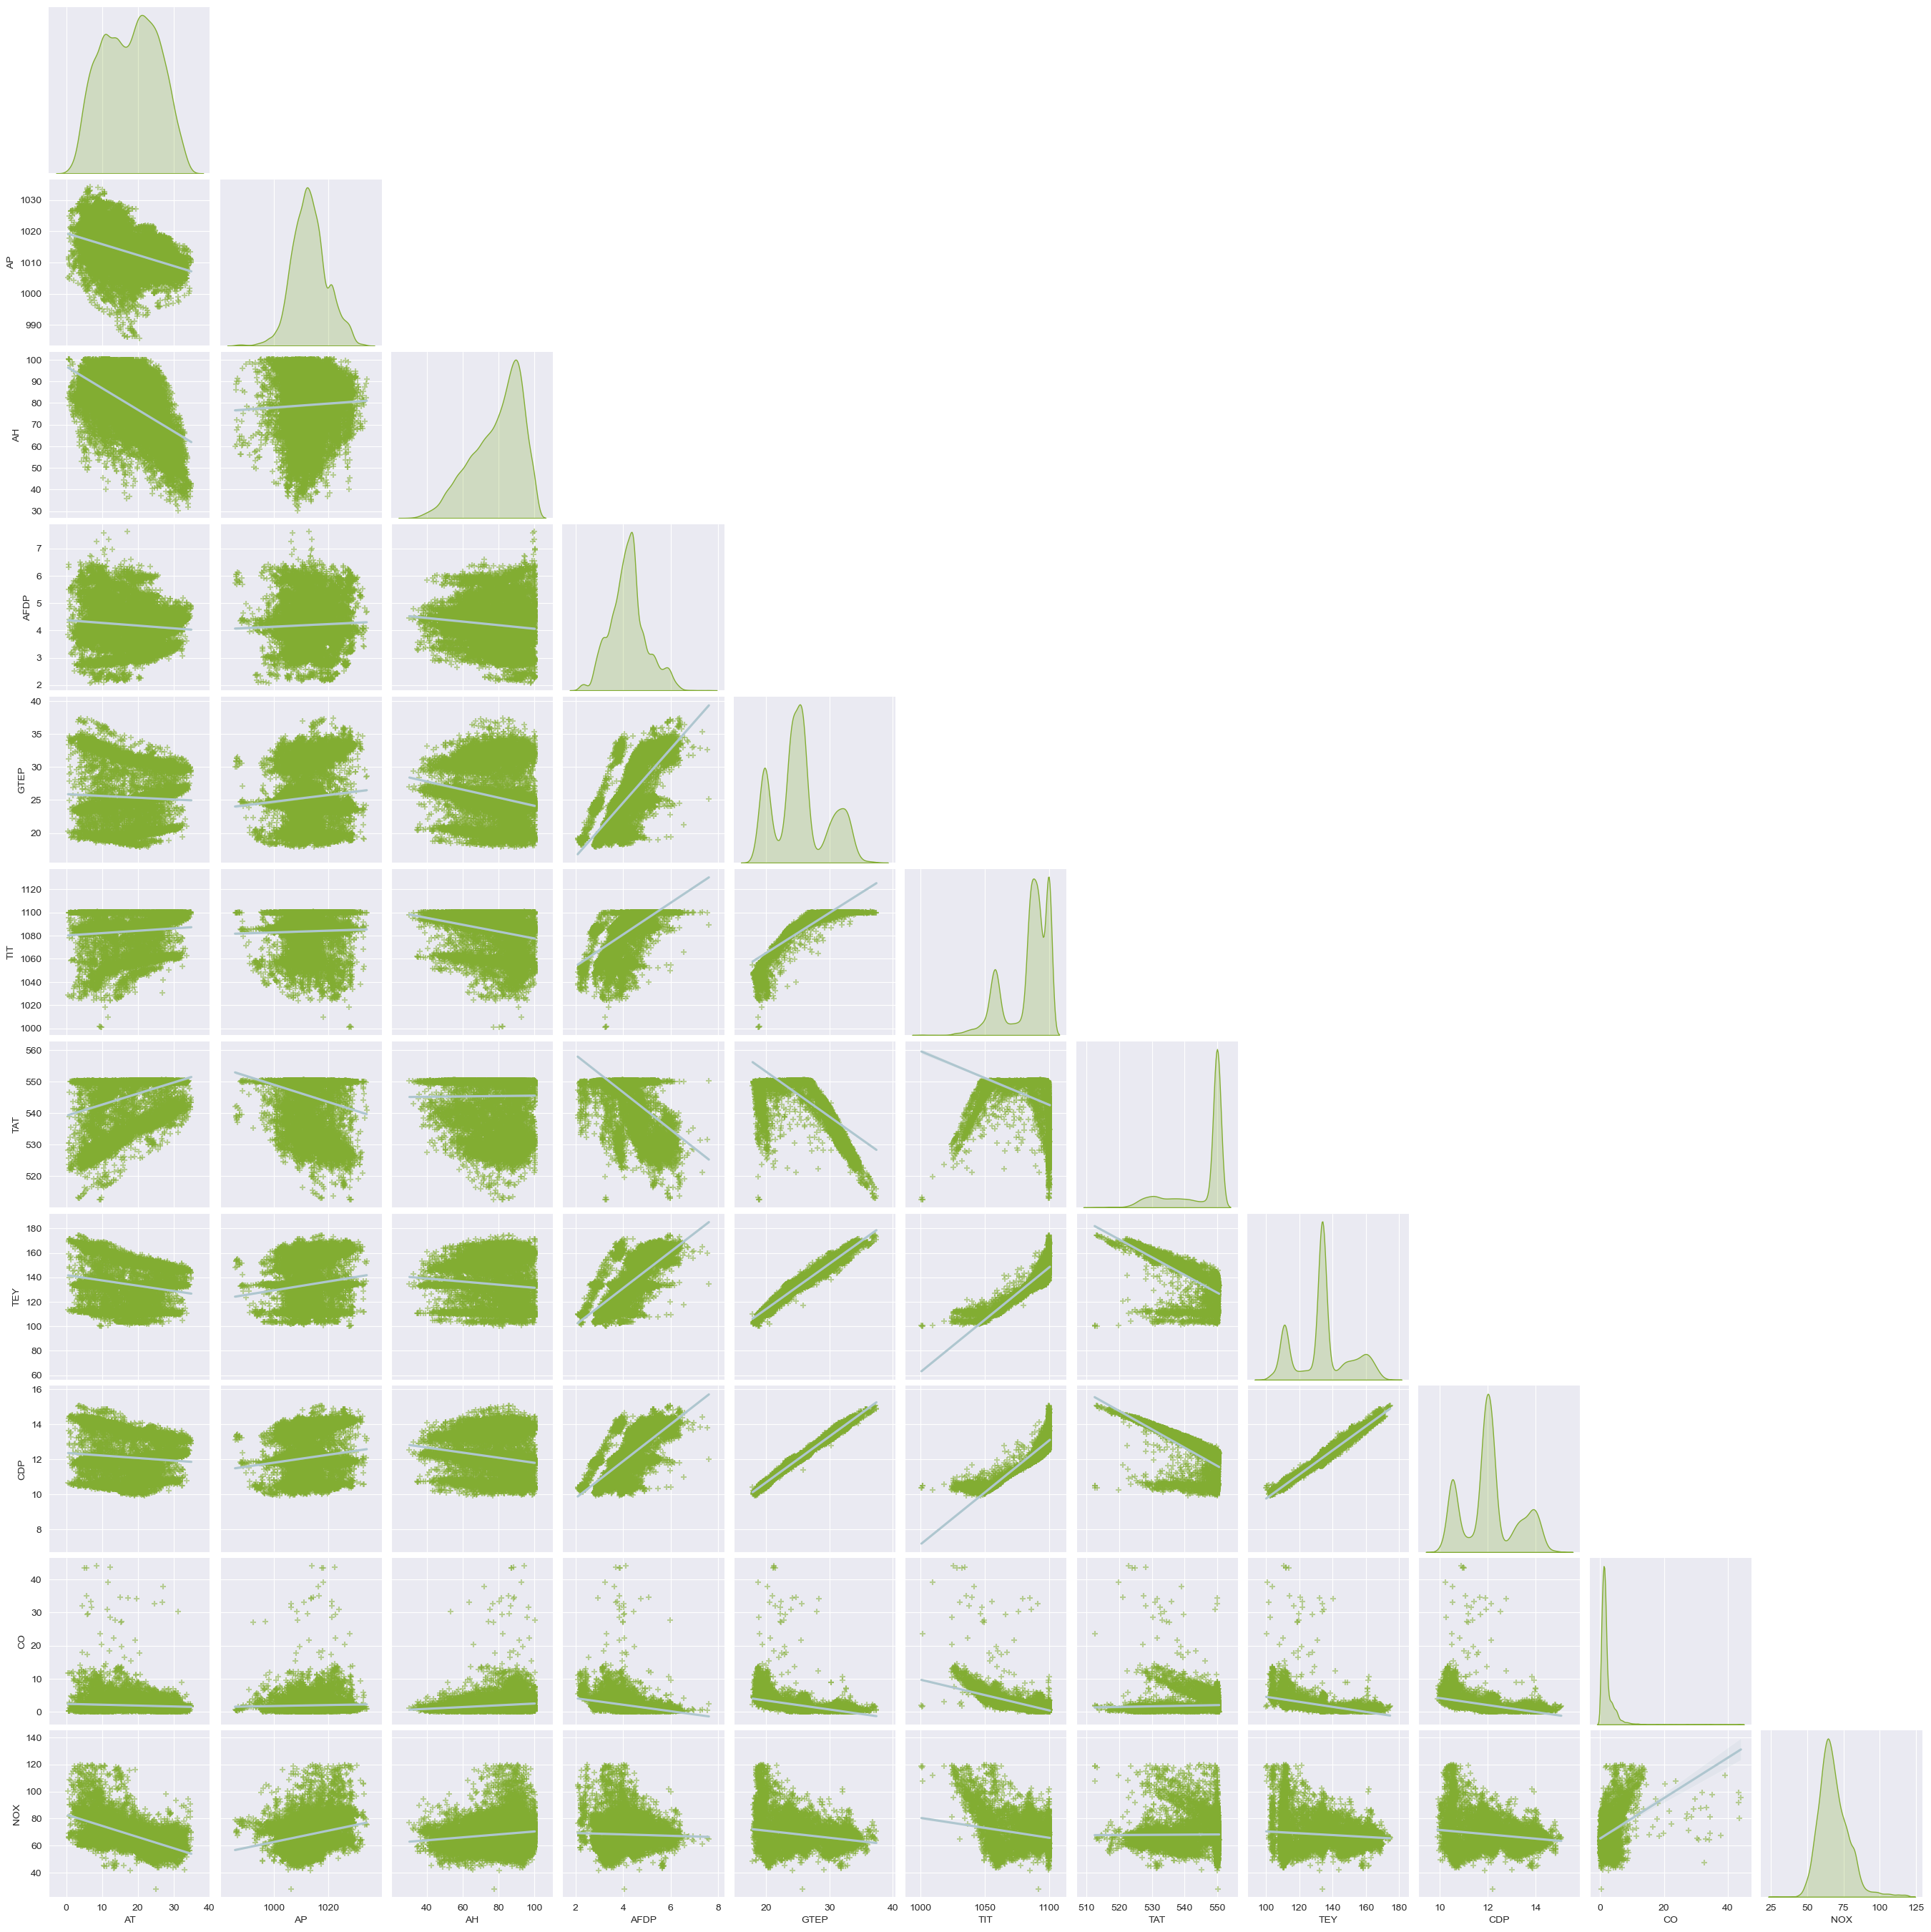

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\527546533.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

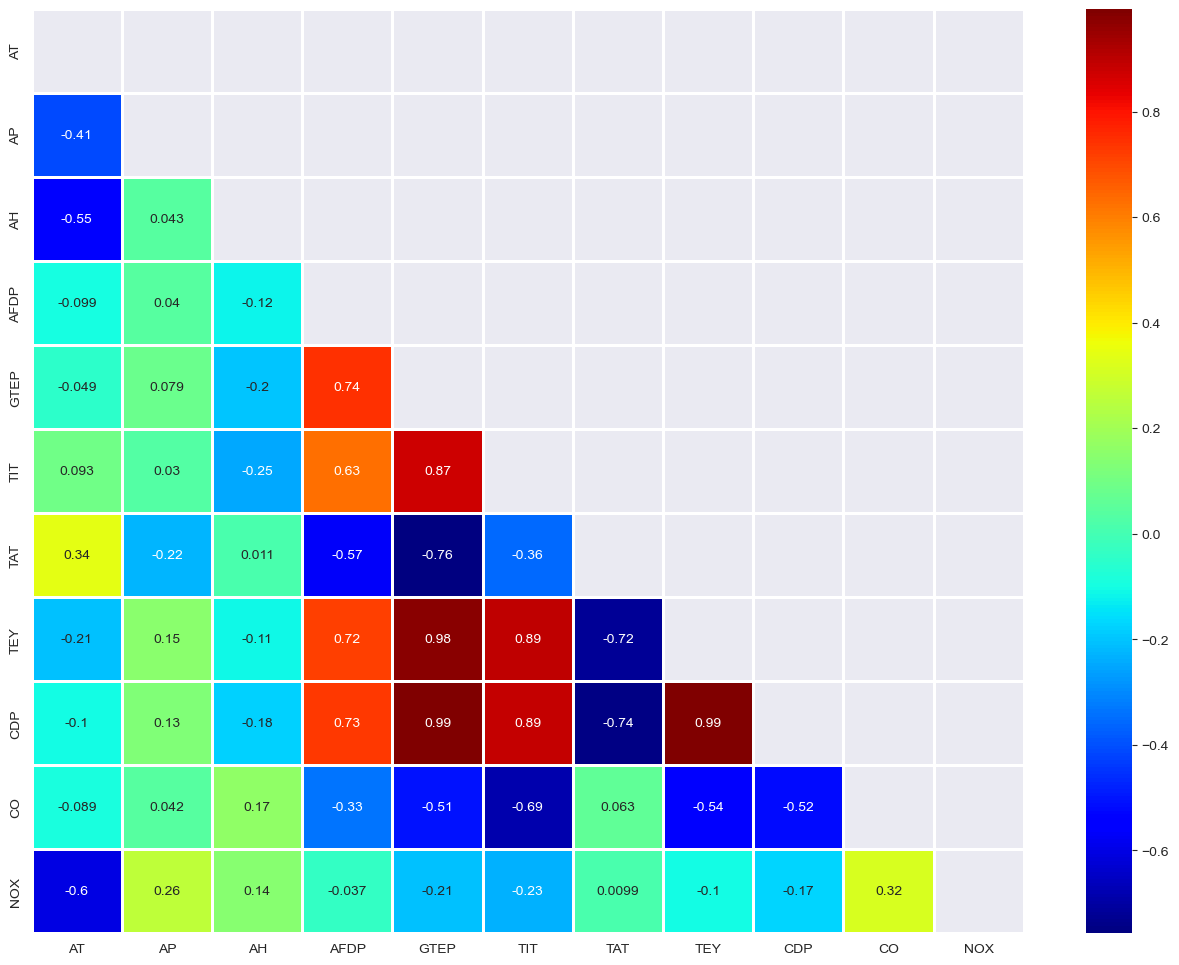

In [23]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

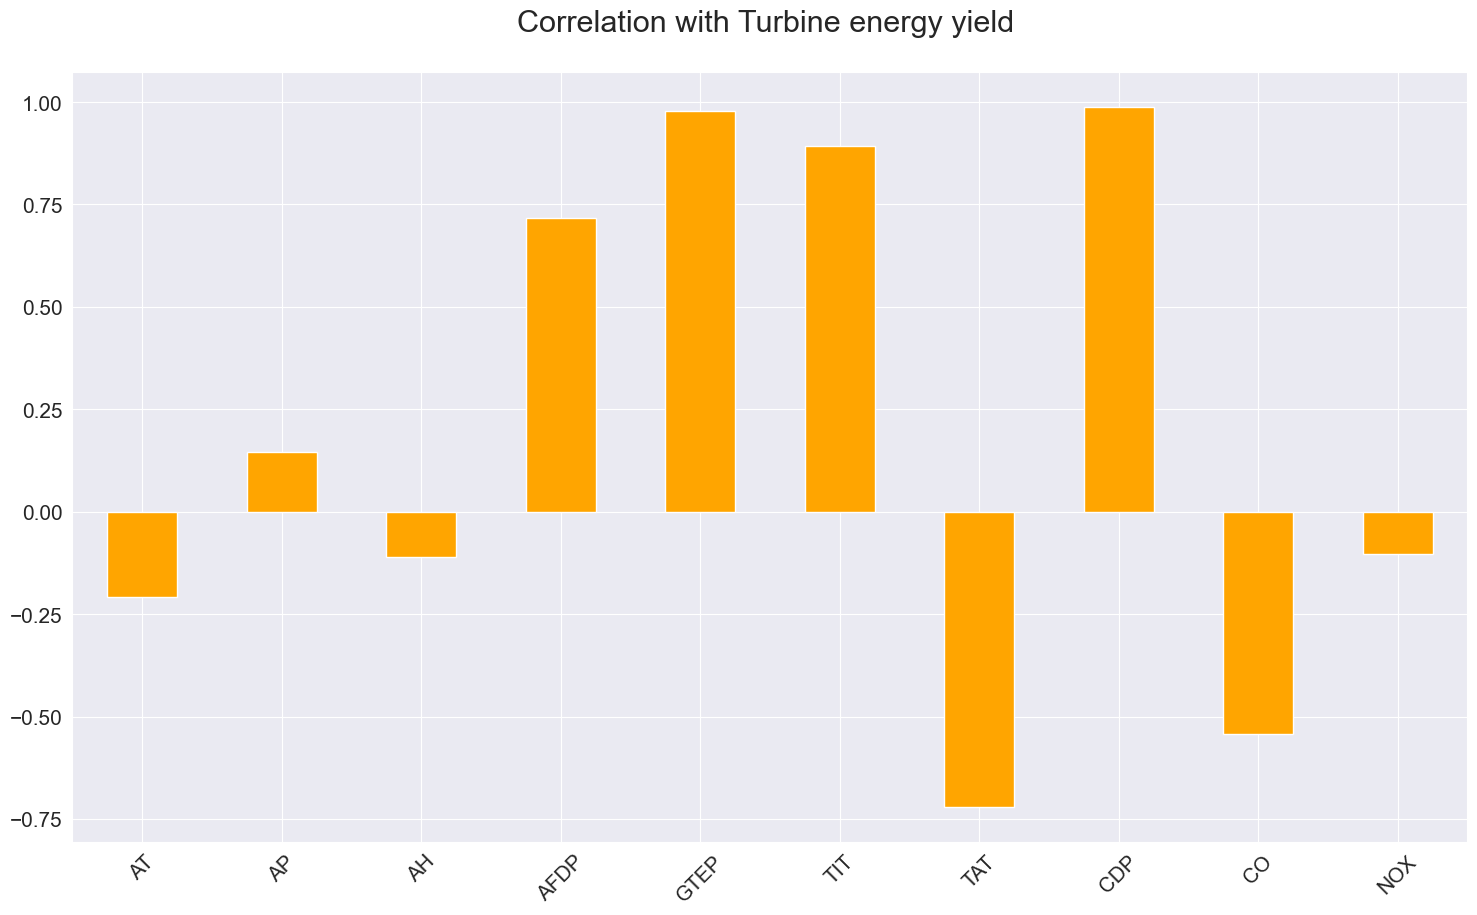

In [24]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [26]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

In [27]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from numpy import set_printoptions
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)


C:\Users\Gujar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [29]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.711135,CDP
4,1.599648,GTEP
5,1.323064,TIT
6,0.893855,TAT
3,0.660791,AFDP
8,0.512732,CO
0,0.412564,AT
9,0.300841,NOX
1,0.139055,AP
2,0.097420,AH


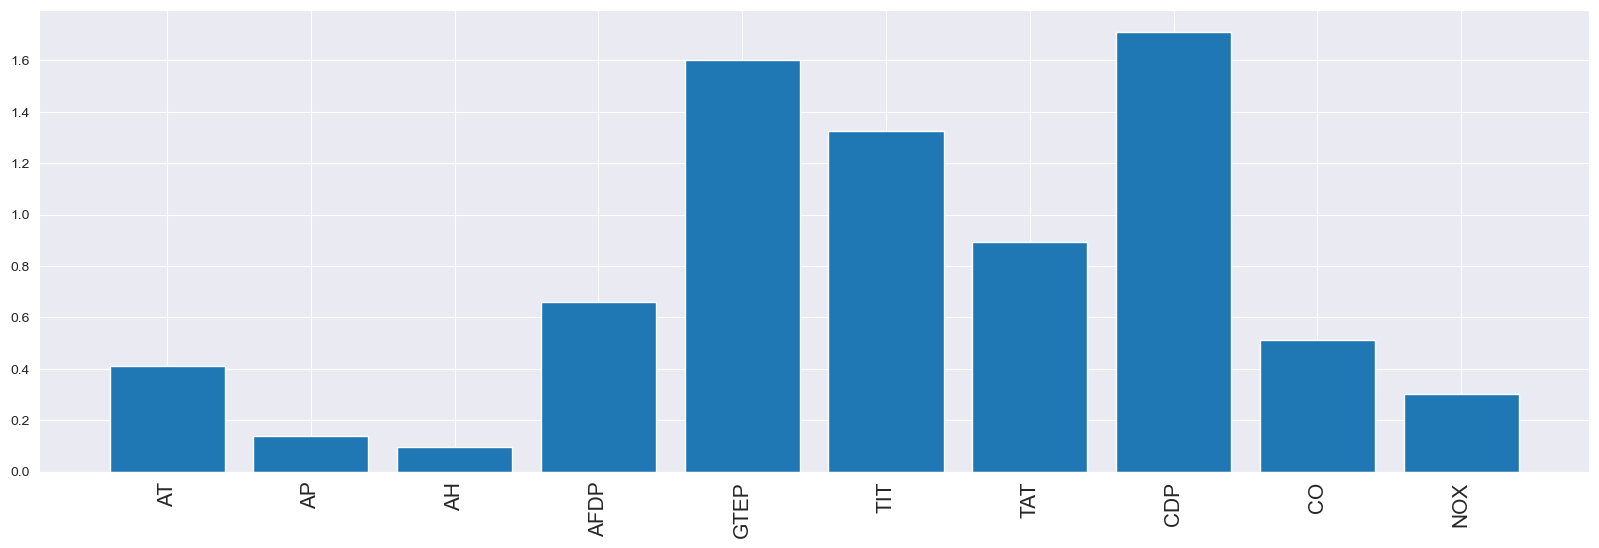

In [30]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

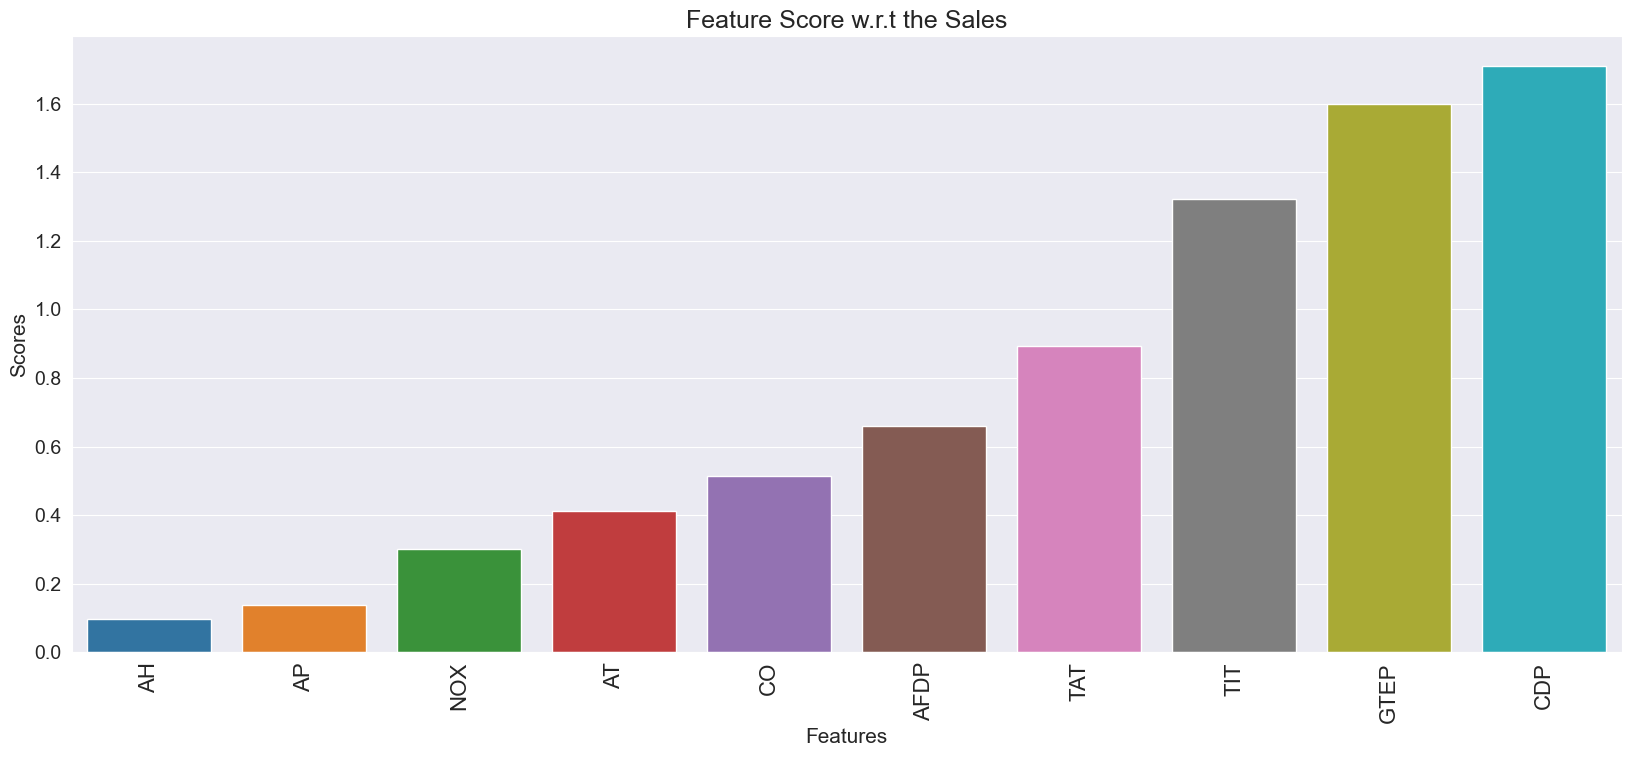

In [31]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [32]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [51]:
x = model_data.copy()
y = df['TEY']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor


In [53]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12031, 8), (3008, 8), (12031,), (3008,))

In [58]:
y_test = y_test.ravel()

In [59]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    # Defining list of hyperparameters
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer='adam', loss='mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train, batch_size=batch_trial, epochs=epochs_trial, verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test - model.predict(x_test_scaled)) / y_test))  
                        
            bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],
                                                                columns=['batchsize', 'epochs', 'Accuracy']))
            
            # Printing the results of the current iteration
            print('batch_size:', batch_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100 - MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
print(finalParamTable)


94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 5 - epochs: 5 Accuracy: 88.90865648498895
94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 5 - epochs: 10 Accuracy: 86.78362447965337
94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 5 - epochs: 50 Accuracy: 86.90449764661608
94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 5 - epochs: 100 Accuracy: 86.87400291076726
94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 10 - epochs: 5 Accuracy: 81.01998579219513
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: 88.56133533569192


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: 86.922540589769


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 10 - epochs: 100 Accuracy: 86.85526978079969
94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 15 - epochs: 5 Accuracy: 59.04383358648485
94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 10 Accuracy: 89.8820012685685


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 50 Accuracy: 86.89495154925572


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 100 

C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


Accuracy: 86.90355057789284
94/94 [==============================] - 0s 2ms/step


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


batch_size: 20 - epochs: 5 Accuracy: 46.00111883212981
94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 10 Accuracy: 80.8133361759605


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 50 Accuracy: 86.88597537467689


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 100 Accuracy: 86.89789111954406
   batchsize  epochs   Accuracy
0          5       5  88.908656
0          5      10  86.783624
0          5      50  86.904498
0          5     100  86.874003
0         10       5  81.019986
0         10      10  88.561335
0         10      50  86.922541
0         10     100  86.855270
0         15       5  59.043834
0         15      10  89.882001
0         15      50  86.894952
0         15     100  86.903551
0         20       5  46.001119
0         20      10  80.813336
0         20      50  86.885975
0         20     100  86.897891


C:\Users\Gujar\AppData\Local\Temp\ipykernel_25620\1568577593.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable = bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100 - MAPE]],


In [60]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParamTable = finalParamTable.reset_index()
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

index         0.000000
batchsize    15.000000
epochs       10.000000
Accuracy     89.882001
Name: 9, dtype: float64

                 Training Model - using best params

In [61]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 8)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 3s 13ms/step - loss: 17631.2656 - mae: 131.8230 - mse: 17631.2656 - val_loss: 16792.9023 - val_mae: 128.6272 - val_mse: 16792.9043
Epoch 2/100
169/169 [==============================] - 1s 4ms/step - loss: 16298.1406 - mae: 126.6678 - mse: 16298.1406 - val_loss: 15742.7207 - val_mae: 124.4778 - val_mse: 15742.7207
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 15324.4727 - mae: 122.7665 - mse: 15324.4727 - val_loss: 14825.2910 - val_mae: 120.7365 - val_mse: 14825.2910
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 14440.6709 - mae: 119.1125 - mse: 14440.6709 - val_loss: 13973.2217 - val_mae: 117.1547 - val_mse: 13973.2217
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 13612.5928 - mae: 115.5831 - mse: 13612.5928 - val_loss: 13169.5850 - val_mae: 113.6732 - val_mse: 13169.5850
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss:

In [63]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9999905428361483
R2_score (test):  0.9997170807051401


In [71]:
from sklearn import metrics

#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly.'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % 100.0 of the target correctly.
